In [13]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss,cohen_kappa_score
# from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/home/alira/ali/train.csv")
df.head()

,Id,CHR,MAPINFO,UCSC_CpG_Islands_Name,UCSC_RefGene_Group,Relation_to_UCSC_CpG_Island,Regulatory_Feature_Group,Forward_Sequence,seq,Beta
0,cg00001583,1,200011786,chr1:200011400-200012055,Body;Body,Island,NaN,CGCCGTTGGGTAGCAGGAGGTAGAGCCTAGGCGAGAGCCTGGTGCG...,GCGCTTCTTTGCCCCGATGAGTTCGCCTCCCCAAACGCCTACTTCG...,0
1,cg00002719,1,169396706,chr1:169396621-169396869,TSS200,Island,NaN,GGACCACACTGCCATGGCAACAGCGTGCCTCTGCGTCCTCCATCCG...,AGTAAGAGACGGAAATAAATTCCTTCCTCCCTGAGTGTCTGGTAAA...,0
2,cg00003202,1,151319512,chr1:151319326-151319545,5'UTR;5'UTR,Island,Promoter_Associated,TGCAAAGTGGAGCGGGGGTGGGGCGGGGTAGCGGAACTCATGCGCT...,AAAGGACTGAAATGCCCAGCAGGTGCTCAAGAATTGCTACCATGGC...,0
3,cg00007036,1,33742089,chr1:33741774-33742381,Body,Island,NaN,GTCGGCCTCGTCGCAGCAGCCGTTGCTAGTGCCGCCGGCACCCGCC...,TTCTTGAAGATAACTTTCCAGAAGTACAATTTCTTGAGTCAAAGGG...,1
4,cg00007898,1,205180627,chr1:205179963-205180910,1stExon;1stExon,Island,Promoter_Associated,GGCCGAAGCCCCGGCACAGCTCGCGGATCATTCCGCCGCCGCCGGG...,AAAGGAAGCAAGACGTTAGGAAAGATTAAAGACTGCACGATTTTAA...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           29065 non-null  object
 1   CHR                          29065 non-null  int64 
 2   MAPINFO                      29065 non-null  int64 
 3   UCSC_CpG_Islands_Name        23717 non-null  object
 4   UCSC_RefGene_Group           24822 non-null  object
 5   Relation_to_UCSC_CpG_Island  23717 non-null  object
 6   Regulatory_Feature_Group     16421 non-null  object
 7   Forward_Sequence             29065 non-null  object
 8   seq                          29065 non-null  object
 9   Beta                         29065 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.2+ MB


In [ ]:
df["seq"]=df["seq"].astype(str)
df=df.reset_index(drop=True)

In [ ]:
# Drop all columns except 'seq' and 'Beta' in a new DataFrame
df_subset = df[['seq', 'Beta']]
df_subset.head()


,seq,Beta
0,GCGCTTCTTTGCCCCGATGAGTTCGCCTCCCCAAACGCCTACTTCG...,0
1,AGTAAGAGACGGAAATAAATTCCTTCCTCCCTGAGTGTCTGGTAAA...,0
2,AAAGGACTGAAATGCCCAGCAGGTGCTCAAGAATTGCTACCATGGC...,0
3,TTCTTGAAGATAACTTTCCAGAAGTACAATTTCTTGAGTCAAAGGG...,1
4,AAAGGAAGCAAGACGTTAGGAAAGATTAAAGACTGCACGATTTTAA...,0


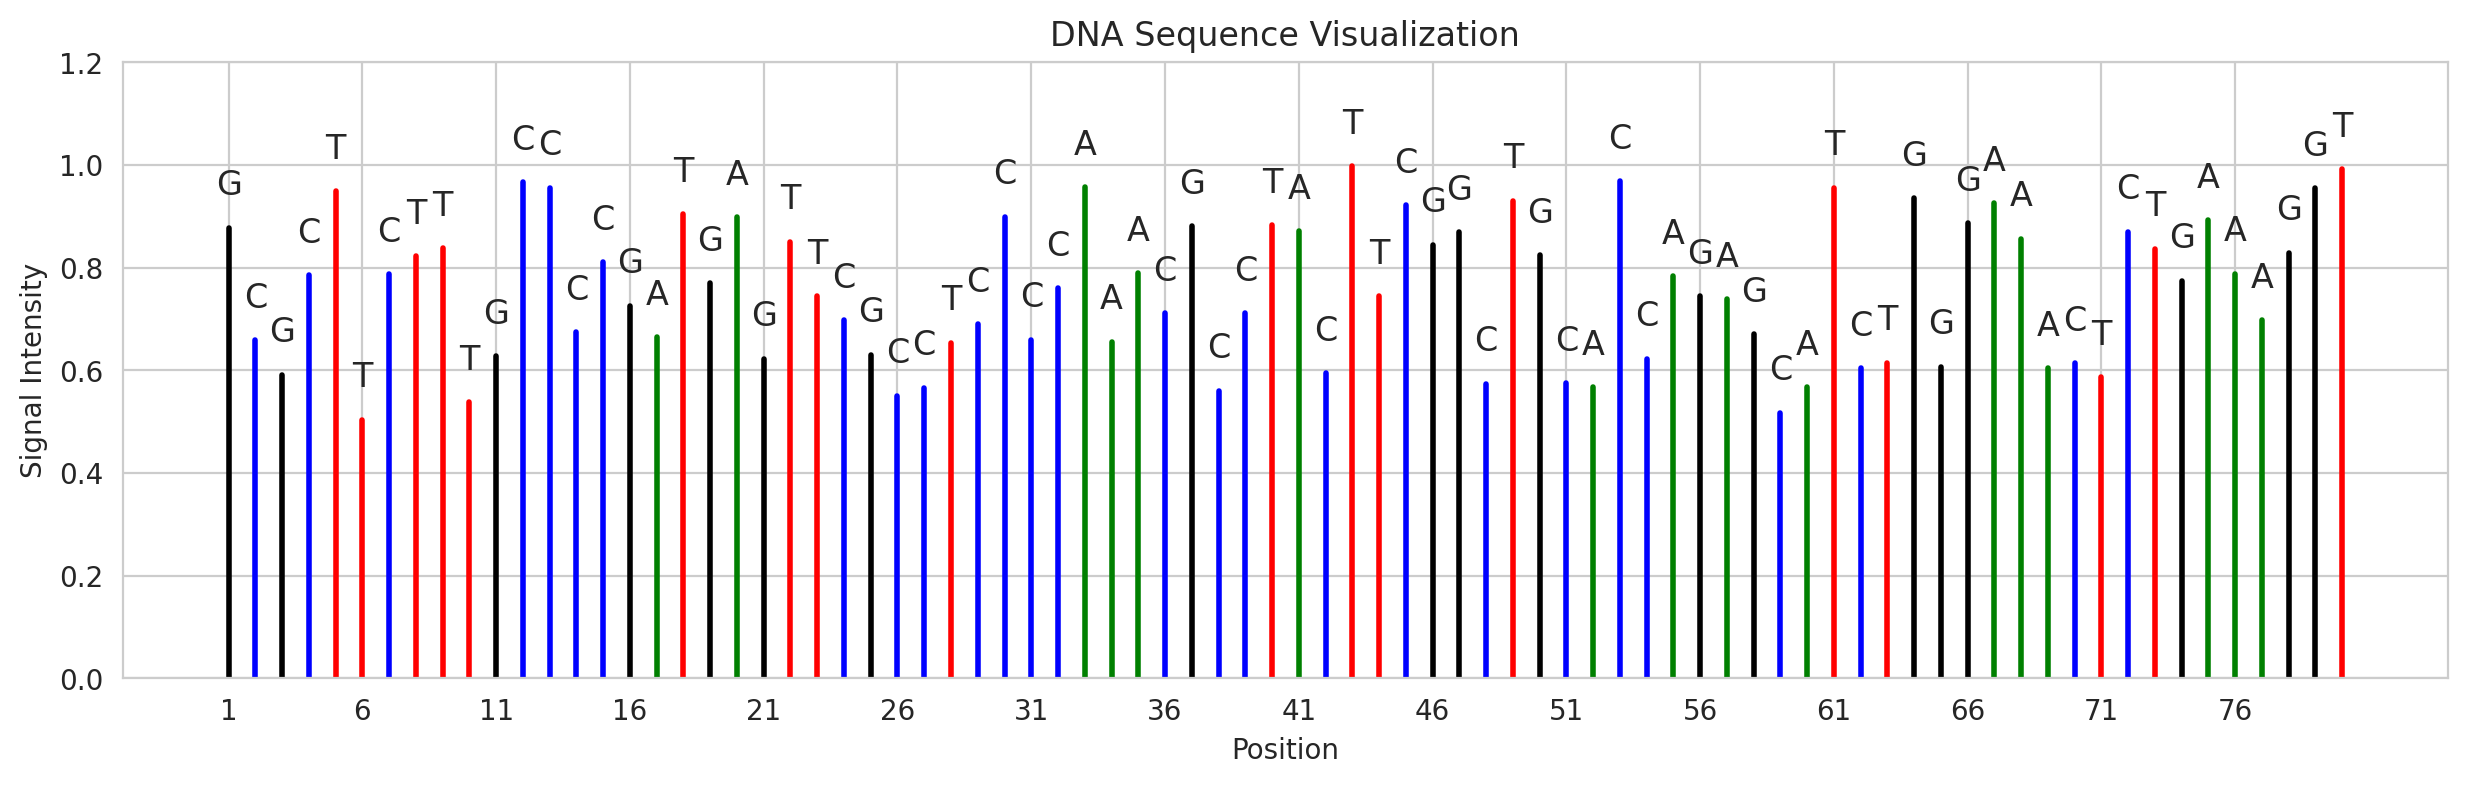

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example DNA sequence
sequence = str(df_subset['seq'][0][:80])

# Map nucleotides to colors
color_map = {'A': 'green', 'C': 'blue', 'G': 'black', 'T': 'red'}

# Simulate chromatogram peaks
x = np.arange(len(sequence))
y = np.random.rand(len(sequence)) * 0.5 + 0.5  # random peak heights for visualization

plt.figure(figsize=(15, 4),dpi=200)

for i, base in enumerate(sequence):
    plt.plot([i, i], [0, y[i]], color=color_map[base], linewidth=2)

# Add letters above peaks
for i, base in enumerate(sequence):
    plt.text(i, y[i]+0.05, base, ha='center', va='bottom', fontsize=12)

# Optional: Add a horizontal axis for position
plt.xticks(np.arange(0, len(sequence), 5), np.arange(1, len(sequence)+1, 5))
plt.xlabel("Position")
plt.ylabel("Signal Intensity")
plt.title("DNA Sequence Visualization")
plt.ylim(0, 1.2)
plt.show()


In [ ]:
df['Beta'].value_counts()

,count
Beta,
0,20243
1,8822


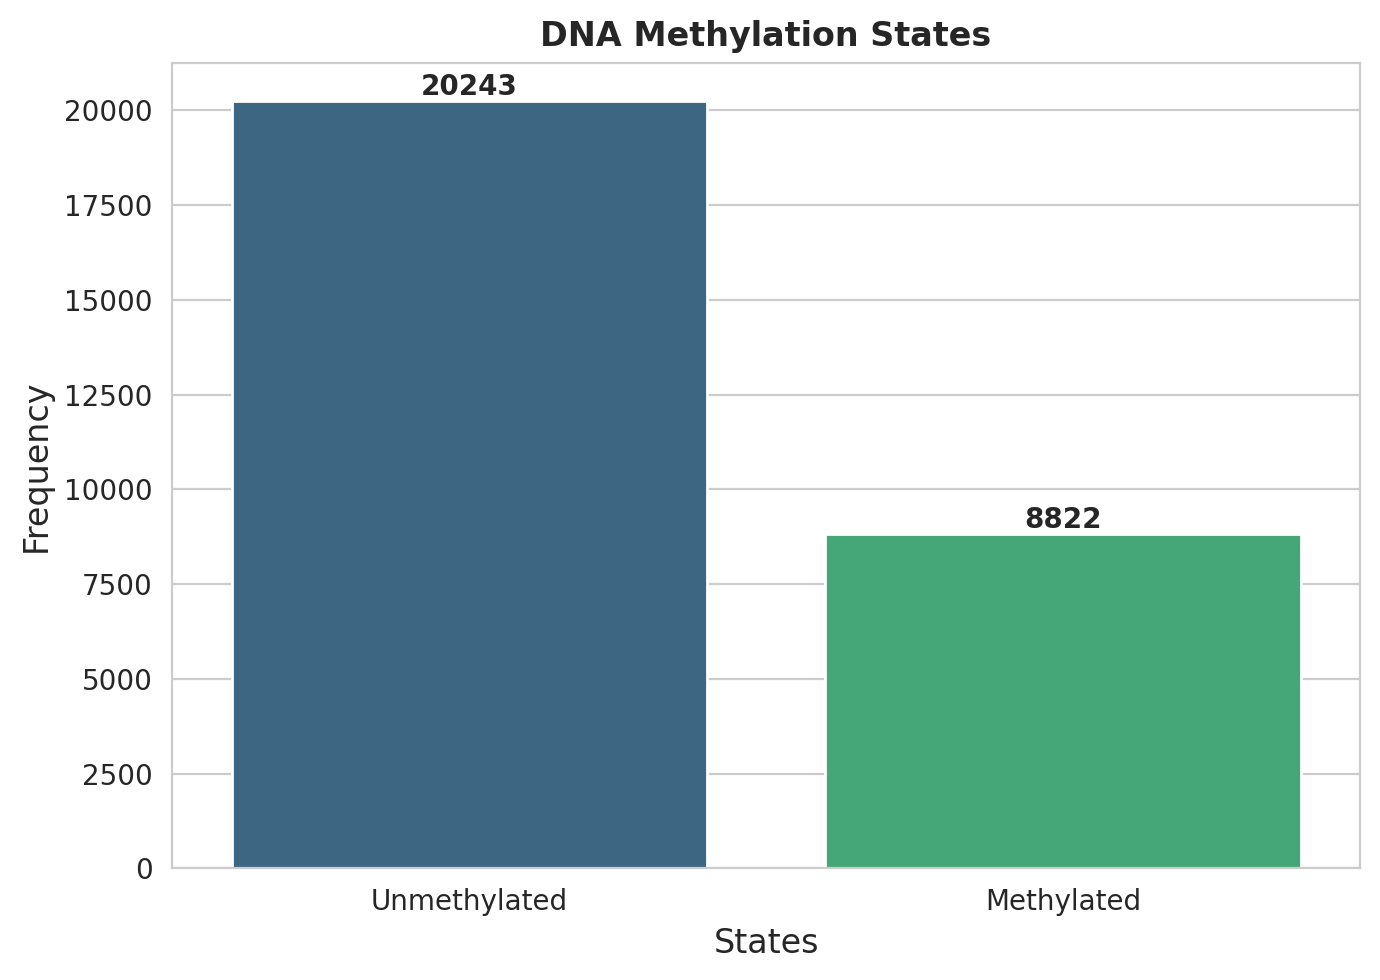

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_counts = df["Beta"].value_counts()

# Set a nice style
sns.set_style("whitegrid")

# Create the barplot
plt.figure(figsize=(7, 5),dpi=200)
# Map the numerical labels to descriptive labels
labels = ["Unmethylated", "Methylated"]
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")

# Add labels and title
plt.title("DNA Methylation States", fontsize=12, weight="bold")
plt.xlabel("States", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Annotate bars with values
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, weight="bold")

# Set the x-axis tick labels
plt.xticks(target_counts.index, labels)


plt.tight_layout()
plt.show()

In [ ]:
# Compute maximum sequence length
max_length = df["seq"].str.len().max()

print("Maximum DNA sequence length:", max_length)

Maximum DNA sequence length: 2000


In [ ]:
# Compute maximum sequence length
max_length = df["seq"].str.len().min()

print("Minimum DNA sequence length:", max_length)

Minimum DNA sequence length: 2000


In [ ]:
# Calculate lengths
df["seq_length"] = df["seq"].str.len()

# Check if all have the same length
all_same = df["seq_length"].nunique() == 1

if all_same:
    print("✅ All DNA sequences have the same length:", df["seq_length"].iloc[0])
else:
    print("❌ Not all sequences have the same length.")
    print(df)

✅ All DNA sequences have the same length: 2000


In [ ]:
# K-mer Tokenization (most common)

# Break each sequence into overlapping substrings of length k.

# Example with k=3 (3-mer):
# Sequence: AGTAC → Tokens: AGT, GTA, TAC

In [ ]:
# Convert DNA sequences to k-mers
def get_kmers(seq, k=3):
    return " ".join([seq[i:i+k] for i in range(len(seq)-k+1)])

df_subset["kmers"] = df_subset["seq"].apply(lambda x: get_kmers(x, k=3))

In [ ]:
df_subset.head()

,seq,Beta,kmers
0,GCGCTTCTTTGCCCCGATGAGTTCGCCTCCCCAAACGCCTACTTCG...,0,GCG CGC GCT CTT TTC TCT CTT TTT TTG TGC GCC CC...
1,AGTAAGAGACGGAAATAAATTCCTTCCTCCCTGAGTGTCTGGTAAA...,0,AGT GTA TAA AAG AGA GAG AGA GAC ACG CGG GGA GA...
2,AAAGGACTGAAATGCCCAGCAGGTGCTCAAGAATTGCTACCATGGC...,0,AAA AAG AGG GGA GAC ACT CTG TGA GAA AAA AAT AT...
3,TTCTTGAAGATAACTTTCCAGAAGTACAATTTCTTGAGTCAAAGGG...,1,TTC TCT CTT TTG TGA GAA AAG AGA GAT ATA TAA AA...
4,AAAGGAAGCAAGACGTTAGGAAAGATTAAAGACTGCACGATTTTAA...,0,AAA AAG AGG GGA GAA AAG AGC GCA CAA AAG AGA GA...


In [ ]:
# split the dataset
x=df_subset['kmers']
y=df_subset['Beta']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_subset['kmers'],df_subset['Beta'], test_size=0.2,shuffle=True)

In [ ]:
max_kmers = df_subset['kmers'].apply(lambda x: len(x.split())).max()
print("Maximum number of k-mers in a sequence:", max_kmers)

Maximum number of k-mers in a sequence: 1998


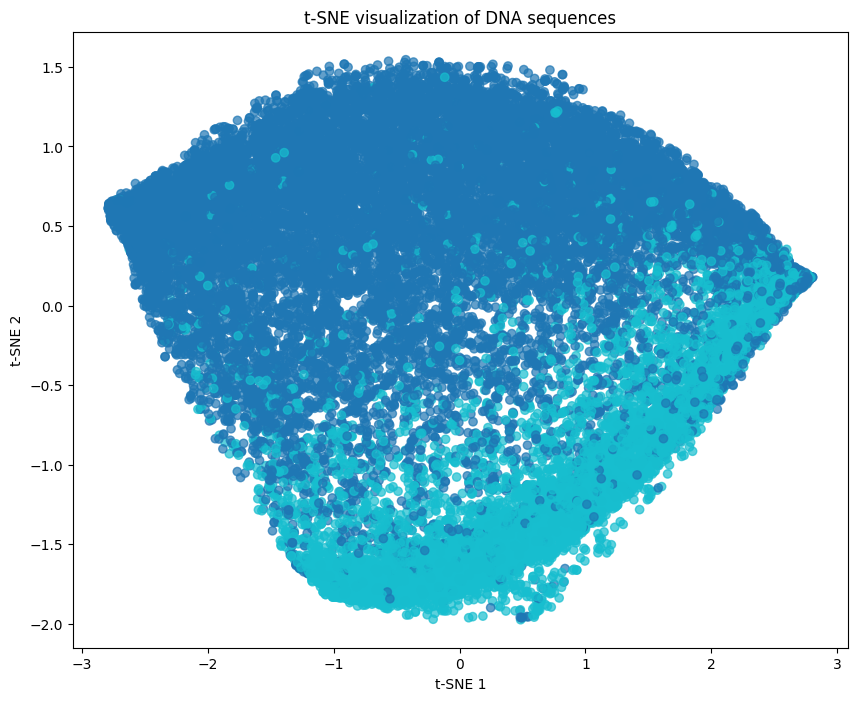

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df_subset['kmers']).toarray()
Y = df_subset['Beta'].values

le = LabelEncoder()
Y_encoded = le.fit_transform(df['Beta'])


tsne = TSNE(n_components=2, perplexity=30, n_iter=260, random_state=0)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE
plt.figure(figsize=(10,8),dpi=100)
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=Y_encoded, cmap='tab10', alpha=0.7)
plt.title("t-SNE visualization of DNA sequences")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
# plt.legend(handles=scatter.legend_elements()[0], labels=le.classes_)
plt.show()


## Hashing

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(n_features=2000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [ ]:
from sklearn.svm import SVC
print("SVC")
clf = SVC(random_state=0,max_iter=500,kernel='linear')
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

SVC
Training time: 62.64434862136841s
Test accuracy score 0.4142439360055049
error rate: 0.5857560639944951
              precision    recall  f1-score   support

           0       0.98      0.17      0.29      4081
           1       0.34      0.99      0.50      1732

    accuracy                           0.41      5813
   macro avg       0.66      0.58      0.40      5813
weighted avg       0.79      0.41      0.35      5813



In [ ]:
from sklearn.tree import DecisionTreeClassifier
print("DT")
clf = DecisionTreeClassifier( random_state=5, max_depth=50)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

DT
Training time: 8.491478681564331s
Test accuracy score 0.9024600034405642
error rate: 0.0975399965594358
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4081
           1       0.84      0.82      0.83      1732

    accuracy                           0.90      5813
   macro avg       0.89      0.88      0.88      5813
weighted avg       0.90      0.90      0.90      5813



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 0.06125283241271973s
Test accuracy score 0.9155341476002065
error rate: 0.08446585239979354
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4081
           1       0.92      0.79      0.85      1732

    accuracy                           0.92      5813
   macro avg       0.92      0.88      0.89      5813
weighted avg       0.92      0.92      0.91      5813



In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 5.347417593002319s
Test accuracy score 0.9317047995871323
error rate: 0.06829520041286774
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4081
           1       0.89      0.88      0.88      1732

    accuracy                           0.93      5813
   macro avg       0.92      0.92      0.92      5813
weighted avg       0.93      0.93      0.93      5813



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=50)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 26.098846435546875s
Test accuracy score 0.9411663512816102
error rate: 0.05883364871838981
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4081
           1       0.90      0.90      0.90      1732

    accuracy                           0.94      5813
   macro avg       0.93      0.93      0.93      5813
weighted avg       0.94      0.94      0.94      5813



## BoW

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer = CountVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.svm import SVC
print("SVC")
clf = SVC(random_state=0,max_iter=1000,kernel='linear')
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

SVC
Training time: 6.109079599380493s
Test accuracy score 0.6177533115430931
error rate: 0.3822466884569069
              precision    recall  f1-score   support

           0       0.84      0.56      0.67      4041
           1       0.43      0.75      0.54      1772

    accuracy                           0.62      5813
   macro avg       0.63      0.65      0.61      5813
weighted avg       0.71      0.62      0.63      5813



In [ ]:
from sklearn.tree import DecisionTreeClassifier
print("DT")
clf = DecisionTreeClassifier( random_state=0, max_depth=50)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

DT
Training time: 5.541250705718994s
Test accuracy score 0.9059005676931017
error rate: 0.09409943230689832
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4041
           1       0.86      0.83      0.84      1772

    accuracy                           0.91      5813
   macro avg       0.89      0.89      0.89      5813
weighted avg       0.91      0.91      0.91      5813



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 0.01267552375793457s
Test accuracy score 0.9148460347496989
error rate: 0.08515396525030106
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4041
           1       0.93      0.78      0.85      1772

    accuracy                           0.91      5813
   macro avg       0.92      0.88      0.89      5813
weighted avg       0.92      0.91      0.91      5813



In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 1.0370750427246094s
Test accuracy score 0.9222432478926544
error rate: 0.07775675210734556
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4041
           1       0.88      0.86      0.87      1772

    accuracy                           0.92      5813
   macro avg       0.91      0.90      0.91      5813
weighted avg       0.92      0.92      0.92      5813



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=50)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 49.258177757263184s
Test accuracy score 0.9437467744710133
error rate: 0.056253225528986706
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4041
           1       0.90      0.92      0.91      1772

    accuracy                           0.94      5813
   macro avg       0.93      0.94      0.93      5813
weighted avg       0.94      0.94      0.94      5813



## TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.svm import SVC
print("SVC")
clf = SVC(random_state=0,max_iter=1000,kernel='linear')
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

SVC
Training time: 0.661088228225708s
Test accuracy score 0.30431790813693443
error rate: 0.6956820918630655
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4044
           1       0.30      1.00      0.47      1769

    accuracy                           0.30      5813
   macro avg       0.15      0.50      0.23      5813
weighted avg       0.09      0.30      0.14      5813



In [ ]:
from sklearn.tree import DecisionTreeClassifier
print("DT")
clf = DecisionTreeClassifier( random_state=0, max_depth=50)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

DT
Training time: 10.70577621459961s
Test accuracy score 0.9029760880784449
error rate: 0.09702391192155513
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4050
           1       0.85      0.83      0.84      1763

    accuracy                           0.90      5813
   macro avg       0.89      0.88      0.88      5813
weighted avg       0.90      0.90      0.90      5813



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 0.012383460998535156s
Test accuracy score 0.9131257526234302
error rate: 0.08687424737656979
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4050
           1       0.93      0.77      0.84      1763

    accuracy                           0.91      5813
   macro avg       0.92      0.87      0.89      5813
weighted avg       0.91      0.91      0.91      5813



In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 0.7853915691375732s
Test accuracy score 0.9296404610356098
error rate: 0.07035953896439018
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4050
           1       0.90      0.87      0.88      1763

    accuracy                           0.93      5813
   macro avg       0.92      0.91      0.92      5813
weighted avg       0.93      0.93      0.93      5813



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=50)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 76.61712574958801s
Test accuracy score 0.9461551694477894
error rate: 0.053844830552210565
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4050
           1       0.91      0.91      0.91      1763

    accuracy                           0.95      5813
   macro avg       0.94      0.94      0.94      5813
weighted avg       0.95      0.95      0.95      5813



### Deafult

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 0.32378506660461426s
Test accuracy score 0.9311887149492517
error rate: 0.0688112850507483
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4108
           1       0.89      0.87      0.88      1705

    accuracy                           0.93      5813
   macro avg       0.92      0.91      0.92      5813
weighted avg       0.93      0.93      0.93      5813



In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2000)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 0.3901190757751465s
Test accuracy score 0.9311887149492517
error rate: 0.0688112850507483
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4108
           1       0.89      0.87      0.88      1705

    accuracy                           0.93      5813
   macro avg       0.92      0.91      0.92      5813
weighted avg       0.93      0.93      0.93      5813



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=30,n_estimators=30)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 34.66402292251587s
Test accuracy score 0.9432306898331326
error rate: 0.05676931016686737
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4108
           1       0.91      0.90      0.90      1705

    accuracy                           0.94      5813
   macro avg       0.93      0.93      0.93      5813
weighted avg       0.94      0.94      0.94      5813



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 81.51965284347534s
Test accuracy score 0.9456390848099088
error rate: 0.05436091519009123
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4108
           1       0.91      0.91      0.91      1705

    accuracy                           0.95      5813
   macro avg       0.93      0.93      0.93      5813
weighted avg       0.95      0.95      0.95      5813



## Word embeddings

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split


# Tokenize k-mer sequences
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(df_subset["kmers"].values)
X = tokenizer.texts_to_sequences(df_subset["kmers"].values)

# Pad sequences to the same length
max_len = max(len(seq.split()) for seq in df_subset["kmers"].values)  # max k-mer length
X = pad_sequences(X, maxlen=max_len, padding='post')

# Convert labels to numpy array
Y=df_subset['Beta']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0,shuffle=True)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout

# Ensure X is shaped like (num_samples, sequence_length)
print("X shape:", X.shape)

vocab_size = 2000   # number of words in vocab
embedding_dim = 100
sequence_length = X.shape[1]  # length of padded sequences

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
# model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build()
print(model.summary())  # this will now show parameters
history = model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.2)


X shape: (29065, 1998)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 934s 2s/step - accuracy: 0.6984 - loss: 0.6017 - val_accuracy: 0.6930 - val_loss: 0.5978
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 916s 1s/step - accuracy: 0.6880 - loss: 0.5952 - val_accuracy: 0.7016 - val_loss: 0.5841
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 832s 1s/step - accuracy: 0.7167 - loss: 0.5749 - val_accuracy: 0.6981 - val_loss: 0.5988
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 851s 1s/step - accuracy: 0.7201 - loss: 0.5774 - val_accuracy: 0.7343 - val_loss: 0.5477
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 853s 1s/step - accuracy: 0.7316 - loss: 0.5626 - val_accuracy: 0.7005 - val_loss: 0.6008
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 812s 1s/step - accuracy: 0.7364 - loss: 0.5700 - val_accuracy: 0.7072 - val_loss: 0.5797
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 847s 1s/step - accuracy: 0.7003 - loss: 0.5990 - val_accuracy: 0.6979 - val_loss: 0.6071
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 794s 1s/step - accuracy: 0.7026 - loss: 0.5972 - val

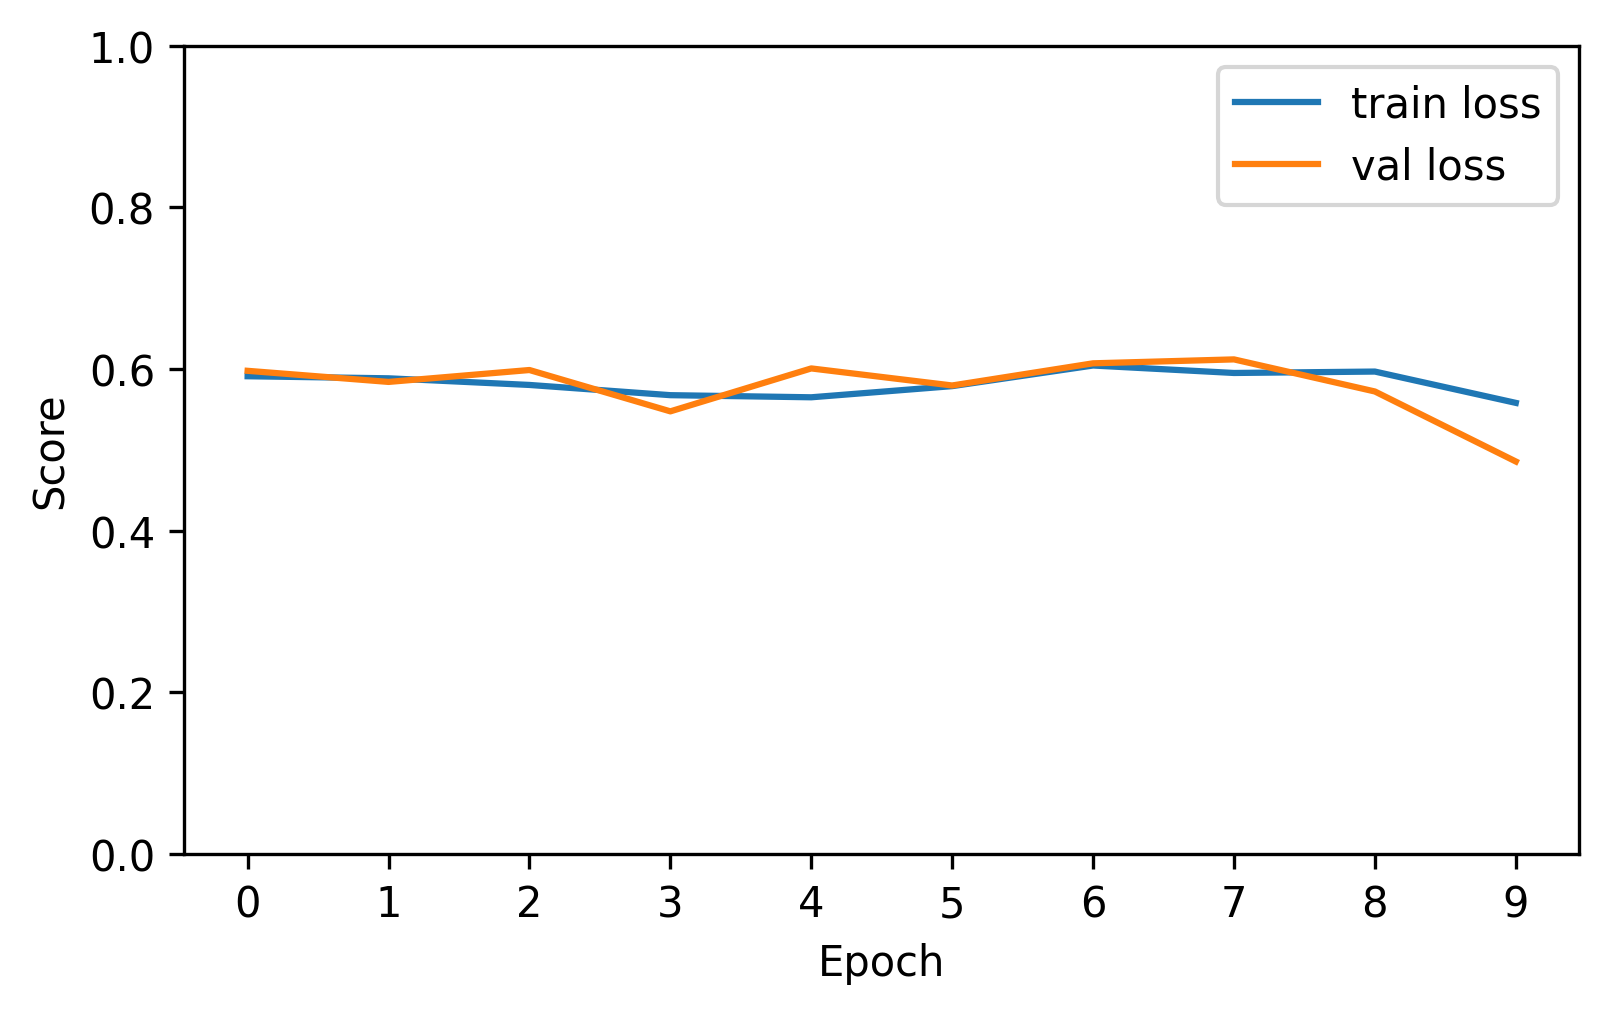

In [ ]:
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 3.5), dpi = 300)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
# plt.plot(history.history['accuracy'], 'r*',label='train accuracy')
# plt.plot(history.history['val_accuracy'],'r*', label='val accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylim(0, 1)
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.show()

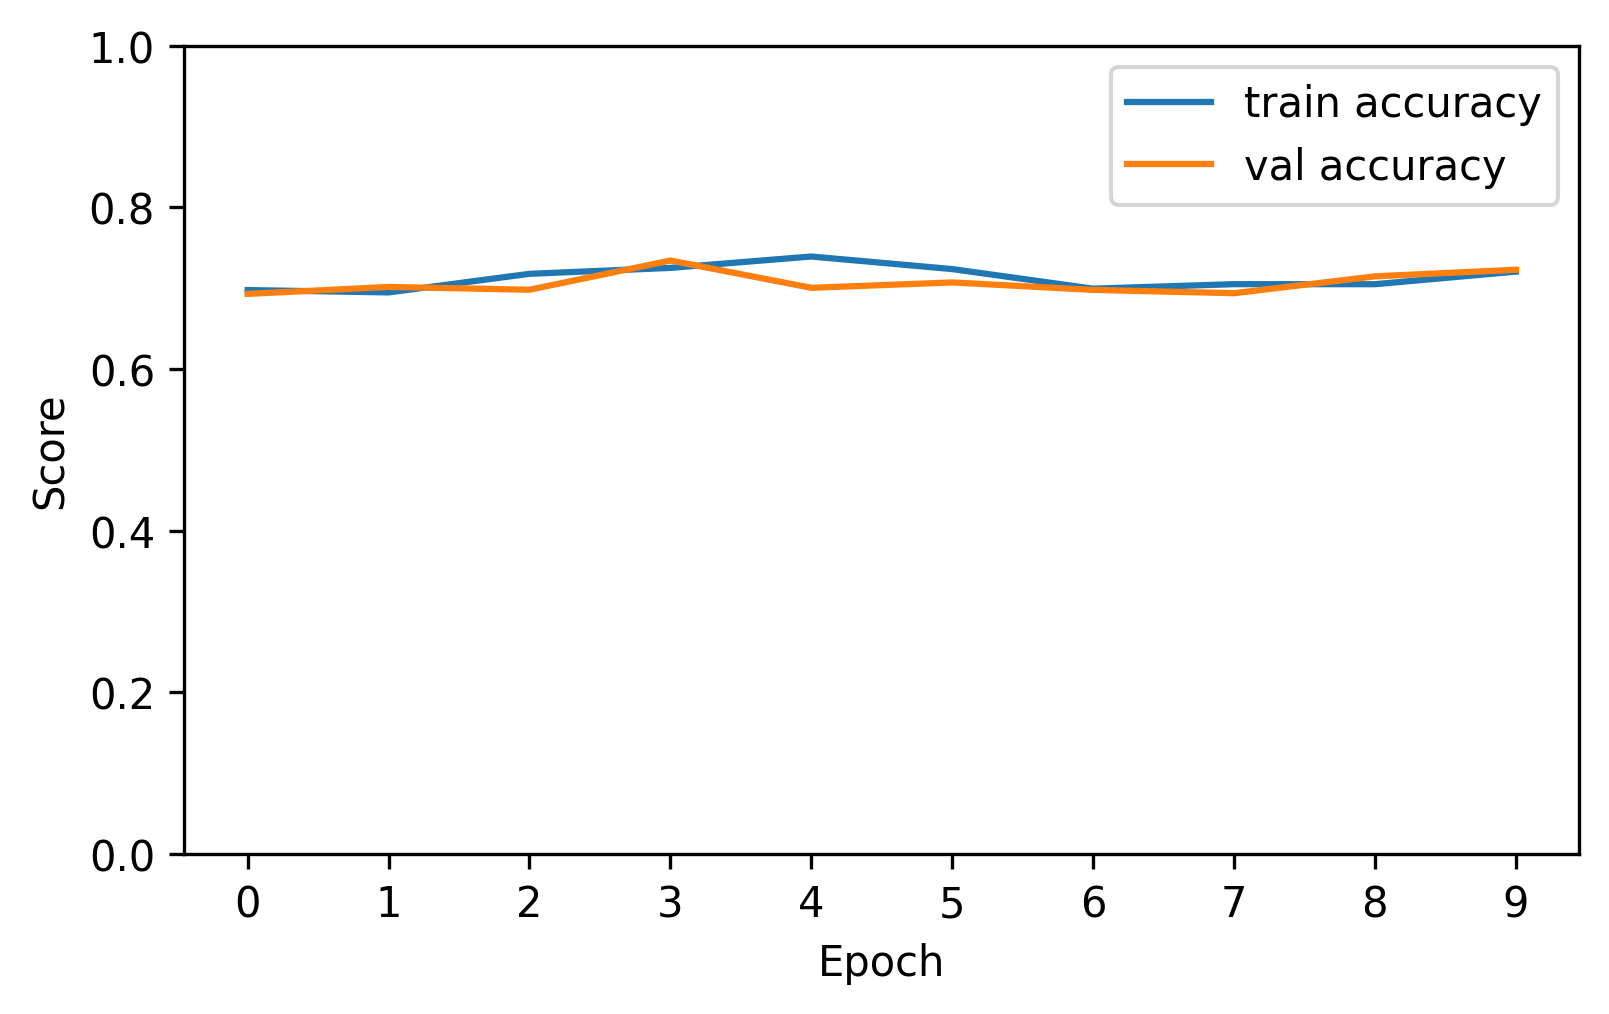

In [ ]:
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 3.5), dpi = 300)
# plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylim(0, 1)
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.show()


In [ ]:
# ----- Evaluate model -----
probabilities = model.predict(X_test)
# pred = np.argmax(probabilities, axis=1)
pred=(probabilities > 0.5).astype(int)
print(classification_report(Y_test, pred))
cf_matrix=confusion_matrix(Y_test, pred)
cf_matrix

182/182 ━━━━━━━━━━━━━━━━━━━━ 45s 246ms/step
              precision    recall  f1-score   support

           0       0.72      0.99      0.83      4035
           1       0.82      0.13      0.22      1778

    accuracy                           0.72      5813
   macro avg       0.77      0.56      0.53      5813
weighted avg       0.75      0.72      0.64      5813



array([[3985,   50],
       [1553,  225]])

## LLM based Features

### DNABERT

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# model_name = "AIRI-Institute/gena-lm-bert-base"
model_name = "zhihan1996/DNABERT-2-117M"
# model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Fix: Explicitly assign the unknown token as the padding token
tokenizer.pad_token = tokenizer.unk_token

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2,
                                                               device_map="auto",

    torch_dtype="auto")

# Tokenize and encode the data
encoded_data = tokenizer(
    df_subset['kmers'].tolist(),
    padding=True,
    truncation=True,
    return_tensors='pt',
    max_length=64
)

tokenizer_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

The repository zhihan1996/DNABERT-2-117M contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/zhihan1996/DNABERT-2-117M .
 You can inspect the repository content at https://hf.co/zhihan1996/DNABERT-2-117M.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


configuration_bert.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/zhihan1996/DNABERT-2-117M:
- configuration_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/468M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/468M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at zhihan1996/DNABERT-2-117M and are newly initialized: ['bert.embeddings.position_embeddings.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.output.LayerNorm.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.1.attention.self.key.bias', 'bert.encoder.layer.1.attention.self.key.weight', 'bert.encoder.layer.1.attention.self.query.bias', 'bert.encoder.layer.1.attention.self.query.weight', 'bert.encoder.layer.1.at

In [ ]:
dfbdna=pd.DataFrame(encoded_data['input_ids'])
dfbdna['Beta']=df_subset['Beta']
dfbdna

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Beta
0,1,19,7,118,4089,29,10,6,2877,29,...,36,13,8,37,14,6,5,1038,2,0
1,1,5,1049,35,20,9,7,5,17,17,...,8,41,2877,28,11,7,15,8,2,0
2,1,18,9,7,5,15,33,17,6,5,...,37,14,6,5,13,34,12,8,2,0
3,1,10,6,2877,29,10,7,23,25,9,...,23,17,7,5,1049,41,22,27,2,1
4,1,18,9,7,5,15,33,25,9,7,...,12,6,5,3206,93,17,8,2061,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,1,9,7,5,17,17,7,5,17,17,...,5,12,27,9,8,3218,23,17,2,0
29061,1,24,14,6,5,1038,40,22,12,7,...,15,8,35,20,18,9,8,5,2,0
29062,1,40,26,34,27,9,7,5,19,36,...,1038,40,2877,28,11,6,19,7,2,0
29063,1,22,12,8,3218,11,7,15,6,19,...,7,5,19,32,27,9,6,5,2,0


In [ ]:
dfbdna.to_csv('DNABERT.csv',index=False)

In [1]:
import pandas as pd
dfbdna = pd.read_csv('/content/DNABERT.csv')
dfbdna.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Beta
0,1,19,7,118,4089,29,10,6,2877,29,...,36,13,8,37,14,6,5,1038,2,0
1,1,5,1049,35,20,9,7,5,17,17,...,8,41,2877,28,11,7,15,8,2,0
2,1,18,9,7,5,15,33,17,6,5,...,37,14,6,5,13,34,12,8,2,0
3,1,10,6,2877,29,10,7,23,25,9,...,23,17,7,5,1049,41,22,27,2,1
4,1,18,9,7,5,15,33,25,9,7,...,12,6,5,3206,93,17,8,2061,2,0


In [2]:
X=dfbdna.drop('Beta',axis=1)
y=dfbdna['Beta']

## ML& DL

In [4]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 8.3 MB/s eta 0:00:00


In [5]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=0)
Xb, Yb = smote.fit_resample(X, y)

print("Shape of X_train after SMOTE:", Xb.shape)
print("Shape of Y_train after SMOTE:", Yb.shape)

Shape of X_train after SMOTE: (40486, 64)
Shape of Y_train after SMOTE: (40486,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xb,Yb, test_size=0.2,shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=300,n_estimators=300)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 45.763704776763916s
Test accuracy score 0.8303284761669548
error rate: 0.16967152383304518
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      4070
           1       0.95      0.69      0.80      4028

    accuracy                           0.83      8098
   macro avg       0.86      0.83      0.83      8098
weighted avg       0.86      0.83      0.83      8098



In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 4.062923908233643s
Test accuracy score 0.5409977772289454
error rate: 0.4590022227710546
              precision    recall  f1-score   support

           0       0.55      0.49      0.52      4070
           1       0.54      0.59      0.56      4028

    accuracy                           0.54      8098
   macro avg       0.54      0.54      0.54      8098
weighted avg       0.54      0.54      0.54      8098



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

Training time: 0.014029502868652344s
Test accuracy score 0.7058532971103977
error rate: 0.2941467028896023
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      4070
           1       0.71      0.68      0.70      4028

    accuracy                           0.71      8098
   macro avg       0.71      0.71      0.71      8098
weighted avg       0.71      0.71      0.71      8098



In [ ]:
from sklearn.svm import SVC
print("SVC")
clf = SVC(random_state=0,max_iter=1000,kernel='linear')
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

SVC
Training time: 2.3308115005493164s
Test accuracy score 0.5265497653741664
error rate: 0.4734502346258336
              precision    recall  f1-score   support

           0       0.56      0.27      0.37      4070
           1       0.52      0.78      0.62      4028

    accuracy                           0.53      8098
   macro avg       0.54      0.53      0.49      8098
weighted avg       0.54      0.53      0.49      8098



In [9]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 958.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.8 MB/s eta 0:00:00


## Pro

In [7]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
RF=RandomForestClassifier(n_estimators=17,max_depth=15, random_state=0)
rfPre1=RF.fit(Xb, Yb).predict_proba(Xb)
rf=pd.DataFrame(rfPre1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(rf,Yb,test_size = 0.2,random_state=0,shuffle=True)

RF


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2000)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

kf = KFold(n_splits=10, shuffle=True)
score = cross_val_score(clf, rf, Yb, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 0.028052330017089844s
Test accuracy score 0.972585823660163
error rate: 0.027414176339837004
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4128
           1       0.98      0.97      0.97      3970

    accuracy                           0.97      8098
   macro avg       0.97      0.97      0.97      8098
weighted avg       0.97      0.97      0.97      8098

0.9720 accuracy with a standard deviation of 0.0023


array([[4032,   96],
       [ 126, 3844]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

kf = KFold(n_splits=10, shuffle=True)
score = cross_val_score(clf, rf, Yb, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 0.01526021957397461s
Test accuracy score 0.9598666337367251
error rate: 0.040133366263274906
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4128
           1       0.98      0.94      0.96      3970

    accuracy                           0.96      8098
   macro avg       0.96      0.96      0.96      8098
weighted avg       0.96      0.96      0.96      8098

0.9582 accuracy with a standard deviation of 0.0029


array([[4045,   83],
       [ 242, 3728]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=30,n_estimators=30)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

kf = KFold(n_splits=10, shuffle=True)
score = cross_val_score(clf, rf, Yb, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 0.9883105754852295s
Test accuracy score 0.9572734008397135
error rate: 0.04272659916028654
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4128
           1       0.95      0.96      0.96      3970

    accuracy                           0.96      8098
   macro avg       0.96      0.96      0.96      8098
weighted avg       0.96      0.96      0.96      8098

0.9556 accuracy with a standard deviation of 0.0033


array([[3938,  190],
       [ 156, 3814]])

In [ ]:
from sklearn.svm import SVC
print("SVC")
clf = SVC(random_state=0,max_iter=1000,kernel='linear')
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('Test accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))

kf = KFold(n_splits=10, shuffle=True)
score = cross_val_score(clf, rf, Yb, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

SVC
Training time: 0.9987304210662842s
Test accuracy score 0.9287478389725858
error rate: 0.07125216102741416
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      4128
           1       0.88      0.99      0.93      3970

    accuracy                           0.93      8098
   macro avg       0.94      0.93      0.93      8098
weighted avg       0.94      0.93      0.93      8098

0.9315 accuracy with a standard deviation of 0.0051


array([[3575,  553],
       [  24, 3946]])

Training time: 0.02s
Test accuracy score: 0.972585823660163
Error rate: 0.027414176339837004
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4128
           1       0.98      0.97      0.97      3970

    accuracy                           0.97      8098
   macro avg       0.97      0.97      0.97      8098
weighted avg       0.97      0.97      0.97      8098



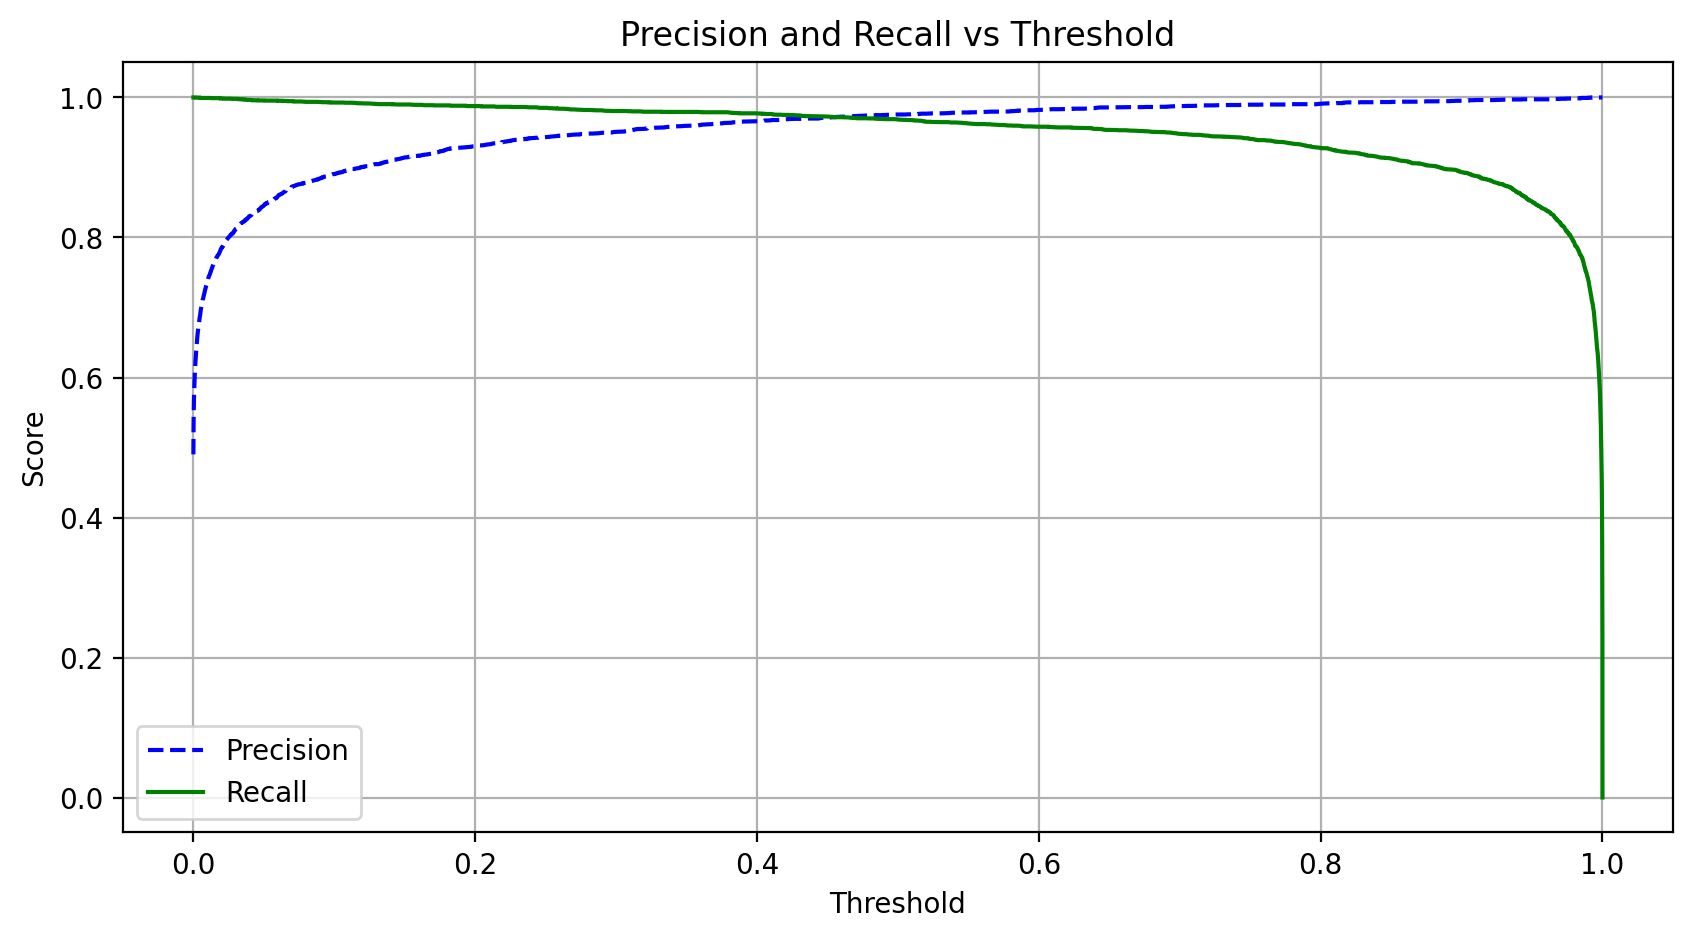

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve

# Train model
clf = LogisticRegression(max_iter=2000)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start:.2f}s")

# Predictions
dtP3 = clf.predict(X_test)
print('Test accuracy score:', accuracy_score(Y_test, dtP3))
print('Error rate:', 1 - accuracy_score(Y_test, dtP3))
print(classification_report(Y_test, dtP3))

# --- Threshold-based plots ---
y_scores = clf.predict_proba(X_test)[:, 1]  # probability for class=1

# Precision-Recall vs Threshold
precisions, recalls, thresholds = precision_recall_curve(Y_test, y_scores)

plt.figure(figsize=(10,5),dpi=200)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


Training time: 0.02s
Test accuracy score: 0.972585823660163
Error rate: 0.027414176339837004
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4128
           1       0.98      0.97      0.97      3970

    accuracy                           0.97      8098
   macro avg       0.97      0.97      0.97      8098
weighted avg       0.97      0.97      0.97      8098



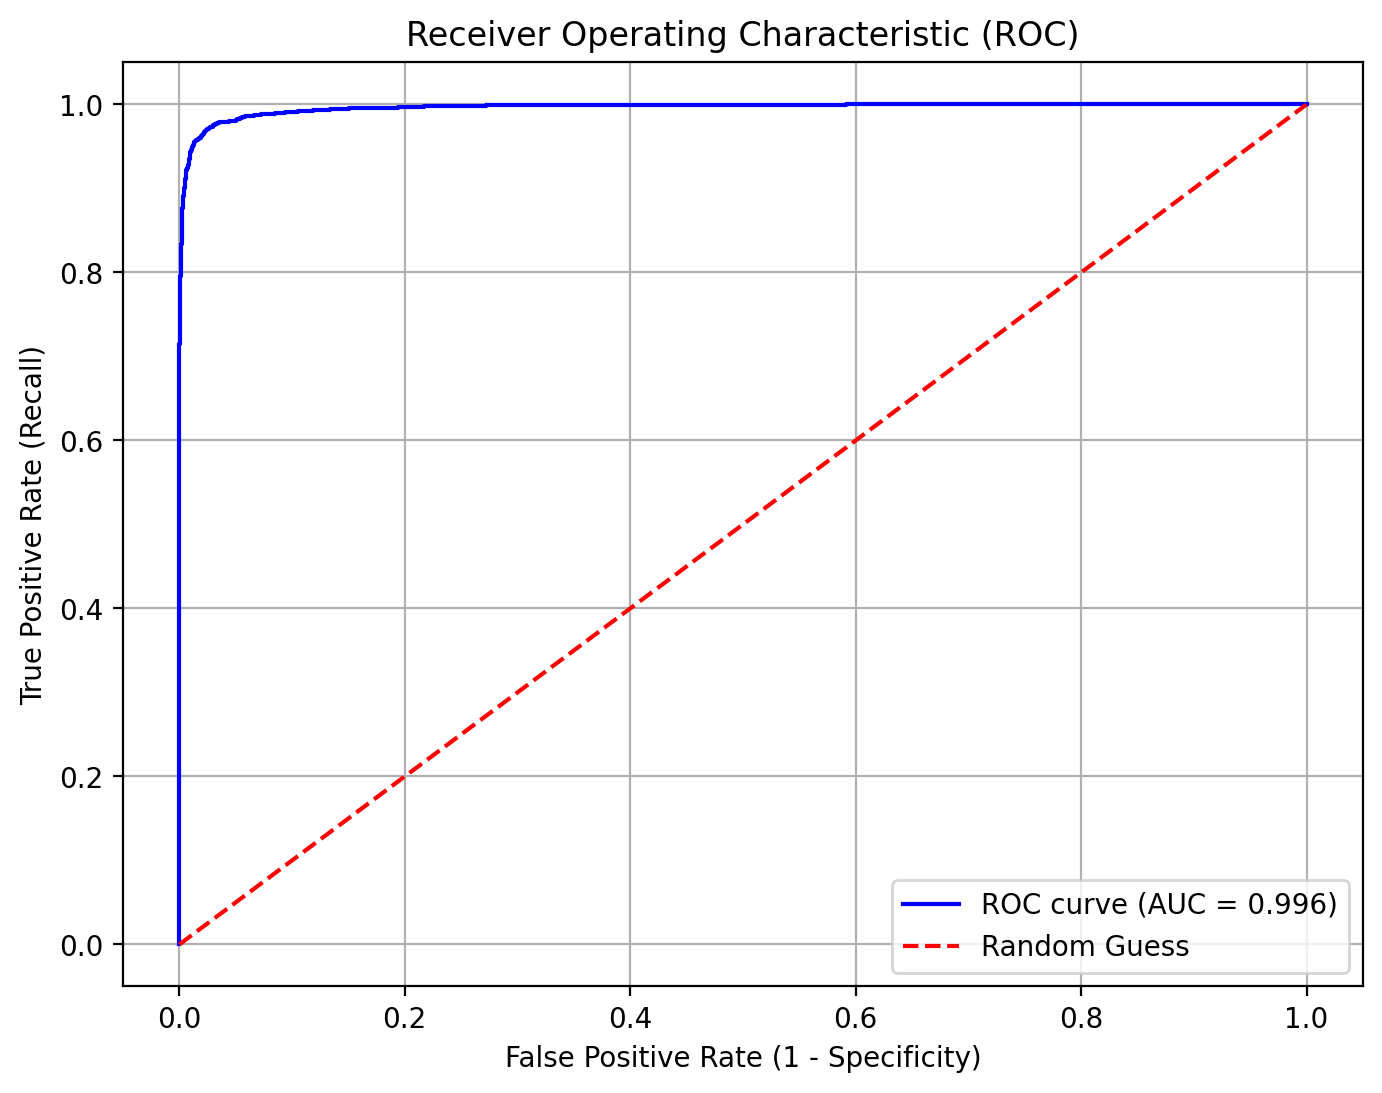

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Train model
clf = LogisticRegression(max_iter=2000)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start:.2f}s")

# Predictions
dtP3 = clf.predict(X_test)
print('Test accuracy score:', accuracy_score(Y_test, dtP3))
print('Error rate:', 1 - accuracy_score(Y_test, dtP3))
print(classification_report(Y_test, dtP3))

# Predicted probabilities for positive class
y_scores = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)
roc_auc = roc_auc_score(Y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8,6),dpi=200)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.grid(True)
plt.show()


## XAI

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00


Training time: 0.02s


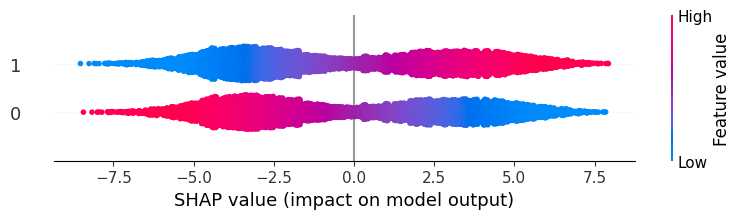

In [ ]:
import shap

# Train model
clf = LogisticRegression(max_iter=2000)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start:.2f}s")


# --- 1. Create SHAP Explainer ---
explainer = shap.Explainer(clf, X_train)   # works with sklearn models
shap_values = explainer(X_test)

# --- 2. Summary Plot (global feature importance) ---
shap.summary_plot(shap_values, X_test)





In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xb,Yb,test_size = 0.2,random_state=0,shuffle=True)

Training time: 4.15s


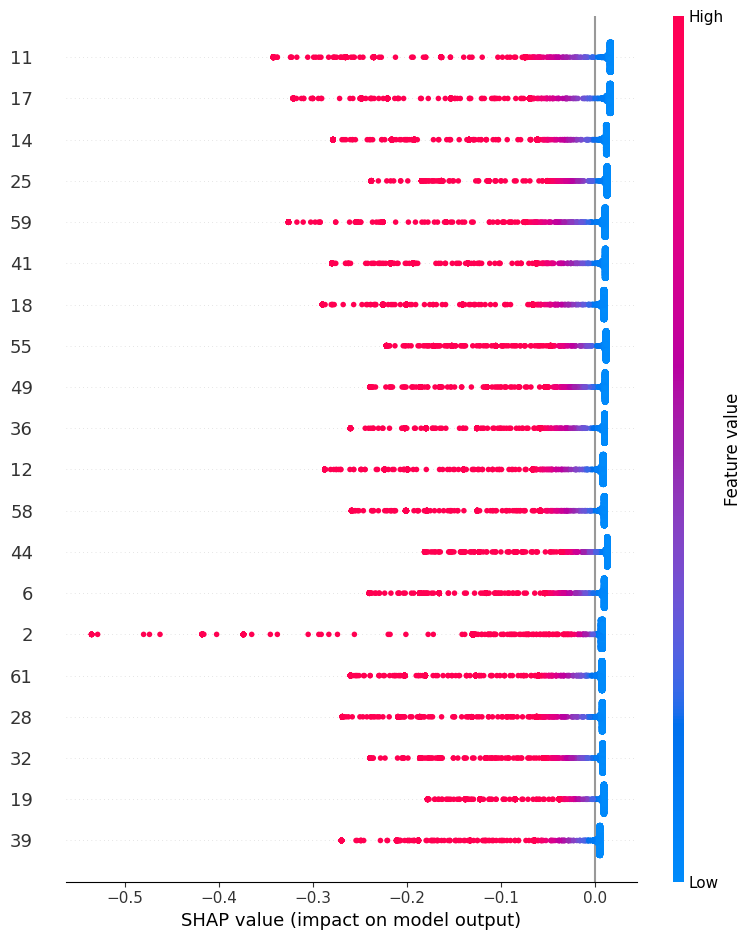

In [ ]:
import shap

# Train model
clf = LogisticRegression(max_iter=2000)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start:.2f}s")


# --- 1. Create SHAP Explainer ---
explainer = shap.Explainer(clf, X_train)   # works with sklearn models
shap_values = explainer(X_test)

# --- 2. Summary Plot (global feature importance) ---
shap.summary_plot(shap_values, X_test)





## GRU and LSTM


In [32]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
RF=RandomForestClassifier(n_estimators=5,max_depth=8, random_state=0)
rfPre1=RF.fit(Xb, Yb).predict_proba(Xb)
rf=pd.DataFrame(rfPre1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(rf,Yb,test_size = 0.2,random_state=0,shuffle=True)

RF


In [42]:
from keras.models import Sequential
import time
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM,GRU,Dropout,SimpleRNN
# Build the LSTM model
model = Sequential()
model.add(LSTM(8, input_shape= (X_train.shape[1], 1), recurrent_dropout=0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])
print(model.summary())
start = time.time()
history=model.fit(X_train, Y_train, validation_split=0.1, epochs=20)
stop = time.time()
print(f"Training time: {stop - start}s")


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 8)              │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5468 - loss: 0.6829 - val_accuracy: 0.6771 - val_loss: 0.5801
Epoch 2/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6853 - loss: 0.5825 - val_accuracy: 0.6820 - val_loss: 0.5705
Epoch 3/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6975 - loss: 0.5673 - val_accuracy: 0.6835 - val_loss: 0.5672
Epoch 4/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6935 - loss: 0.5643 - val_accuracy: 0.6820 - val_loss: 0.5660
Epoch 5/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6934 - loss: 0.5612 - val_accuracy: 0.6848 - val_loss: 0.5649
Epoch 6/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6967 - loss: 0.5601 - val_accuracy: 0.6829 - val_loss: 0.5652
Epoch 7/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6983 - loss: 0.5613 - val_accuracy: 0.6842 - val_loss: 0.5645
Epoch 8/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6993 - loss: 0.5617 - val_accurac

In [43]:
scores = model.predict(X_test)
scores=(scores > 0.5).astype(int)
print('accuracy score',accuracy_score(Y_test,scores))
print('error rate:',1-accuracy_score(Y_test,scores))
print(classification_report(Y_test,scores))


254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
accuracy score 0.6998024203507038
error rate: 0.30019757964929616
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      4128
           1       0.73      0.61      0.67      3970

    accuracy                           0.70      8098
   macro avg       0.70      0.70      0.70      8098
weighted avg       0.70      0.70      0.70      8098



In [44]:
from keras.models import Sequential
import time
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM,GRU,Dropout,SimpleRNN
# Build the LSTM model
model = Sequential()
model.add(GRU(8, input_shape= (X_train.shape[1], 1)))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])
print(model.summary())
start = time.time()
history=model.fit(X_train, Y_train, validation_split=0.1, epochs=20)
stop = time.time()
print(f"Training time: {stop - start}s")


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 585 (2.29 KB)

 Trainable params: 585 (2.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5997 - loss: 0.6525 - val_accuracy: 0.6860 - val_loss: 0.5702
Epoch 2/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7000 - loss: 0.5564 - val_accuracy: 0.6764 - val_loss: 0.5740
Epoch 3/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6943 - loss: 0.5579 - val_accuracy: 0.6842 - val_loss: 0.5659
Epoch 4/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6947 - loss: 0.5601 - val_accuracy: 0.6798 - val_loss: 0.5649
Epoch 5/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6961 - loss: 0.5551 - val_accuracy: 0.6820 - val_loss: 0.5646
Epoch 6/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6950 - loss: 0.5574 - val_accuracy: 0.6851 - val_loss: 0.5647
Epoch 7/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6974 - loss: 0.5584 - val_accuracy: 0.6829 - val_loss: 0.5650
Epoch 8/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6972 - loss: 0.5582 - val_accurac

In [45]:
scores = model.predict(X_test)
scores=(scores > 0.5).astype(int)
print('accuracy score',accuracy_score(Y_test,scores))
print('error rate:',1-accuracy_score(Y_test,scores))
print(classification_report(Y_test,scores))


254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
accuracy score 0.6975796492961225
error rate: 0.3024203507038775
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      4128
           1       0.70      0.66      0.68      3970

    accuracy                           0.70      8098
   macro avg       0.70      0.70      0.70      8098
weighted avg       0.70      0.70      0.70      8098

